In [1]:
import numpy as np
import pebbles
import healpy as hp
import pysm
import matplotlib.pyplot as plt
import multiprocessing
from schwimmbad import JoblibPool
%matplotlib inline

In [28]:
nside = 256
nmc = 4
peb = pebbles.Pebbles(nside, 'simset0', 'planck2015_AL0p5', 'SO_11', nmc=nmc)
d1 = pysm.nominal.models('d1', nside)
beta_true_n16 = hp.ud_grade(d1[0]['spectral_index'], nside_out=16)
beta_true_n02 = hp.ud_grade(d1[0]['spectral_index'], nside_out=2)

In [29]:
peb.compute_simulated_data()
data = peb.load_simulated_data()

  0%|          | 0/2 [00:00<?, ?it/s]

Running CLASS with lensing efficiency:  0.5
Generating CMB realizations
Computing CMB map  0  of  2.0


 50%|█████     | 1/2 [00:00<00:00,  2.24it/s]

Computing CMB map  1  of  2.0


  0%|          | 0/4 [00:00<?, ?it/s]

Computing noise realizations
Adding noise map number  0  of  4


 25%|██▌       | 1/4 [00:03<00:09,  3.33s/it]

Adding noise map number  1  of  4


 50%|█████     | 2/4 [00:57<00:37, 18.65s/it]

Adding noise map number  2  of  4


 75%|███████▌  | 3/4 [01:00<00:13, 13.96s/it]

Adding noise map number  3  of  4


100%|██████████| 4/4 [01:03<00:00, 10.68s/it]


In [30]:
with JoblibPool(8) as pool:
    peb.clean_simulated_data(data, 'BdBsTd_ns1', pool)

fitting: BdBsTd_ns1


100%|██████████| 40/40 [00:02<00:00, 14.36it/s]


In [31]:
with JoblibPool(8) as pool:
    peb.clean_simulated_data(data, 'betad_only_ns2', pool)

fitting: betad_only_ns2


100%|██████████| 124/124 [00:21<00:00,  5.68it/s]


In [34]:
with JoblibPool(8) as pool:
    peb.clean_simulated_data(data, 'betad_only_ns16', pool)

fitting: betad_only_ns16


 22%|██▏       | 1024/4748 [00:07<00:32, 114.57it/s]/global/u1/b/bthorne/Projects/simonsobs/mapspace/src/pebbles/bfore/maplike.py:153: RuntimeWarning: overflow encountered in multiply
  fprod=f_matrix[:,None,:]*f_matrix[None,:,:]
/global/homes/b/bthorne/anaconda3/envs/pebbles/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
100%|██████████| 4748/4748 [00:37<00:00, 127.28it/s]


In [40]:
beta_n02 = peb.load_cleaned_spec_maps('betad_only_ns2', 1)
beta_n16 = peb.load_cleaned_spec_maps('betad_only_ns16', 1)

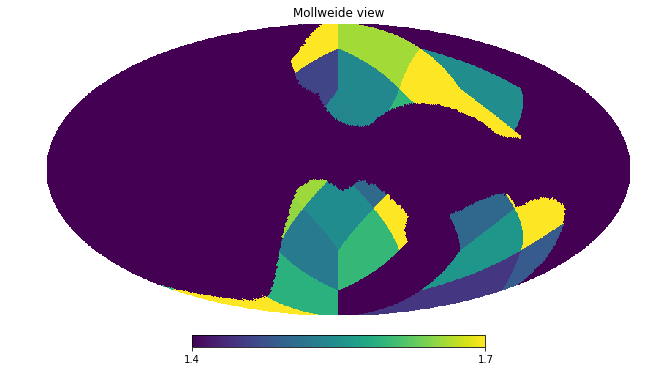

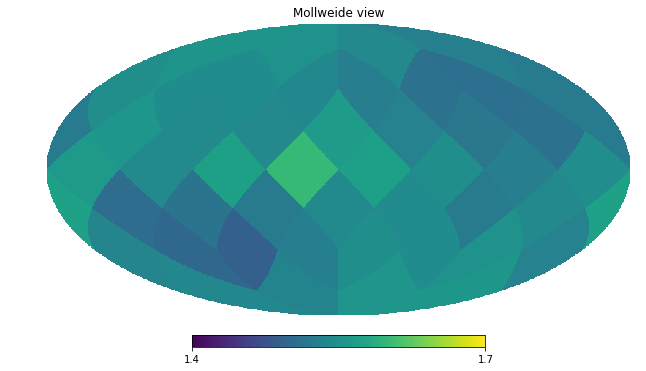

In [41]:
hp.mollview(beta_n02, min=1.4, max=1.7)
hp.mollview(beta_true_n02, min=1.4, max=1.7)

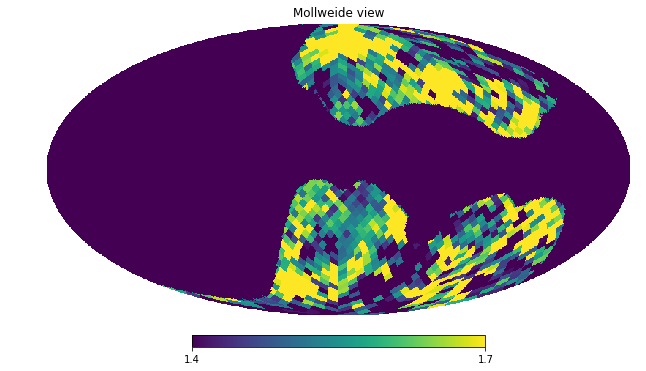

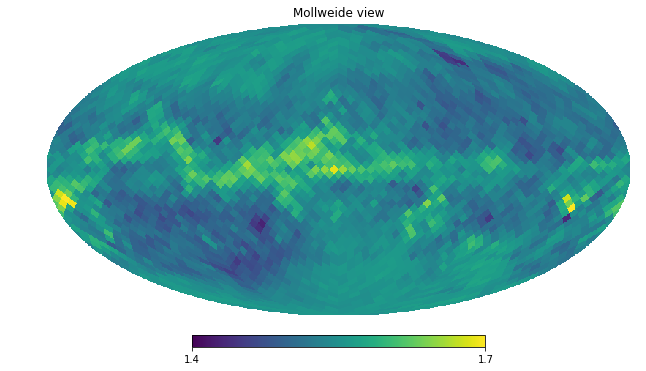

In [42]:
hp.mollview(beta_n16, min=1.4, max=1.7)
hp.mollview(beta_true_n16, min=1.4, max=1.7)

In [56]:
ad = peb.load_cleaned_amp_maps('betad_only_ns16', 'cmb', 'q', 0)

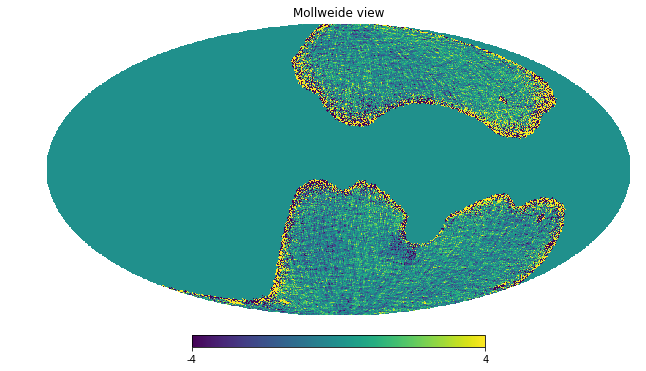

In [57]:
hp.mollview(ad, min=-4, max=4)